In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
pio.renderers.default = 'notebook' 
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')

In [4]:
# data_dir = 'Data/spain/one year'
# file = '/17255_27460_3077038_WAVE_20230615114433_20240622114433.csv'
data_dir = 'Data/spain/four years'
file = '/17286_27577_3106036_WAVE_20200618145316_20240618145316.csv'

col_names = ['Fecha (GMT)',	'Altura Signif. del Oleaje(m)',	'Periodo Medio(s)', 'Periodo de Pico(s)', 'Direcc. Media de Proced.(0=N 90=E)',	'Mar de viento:  Altura signif. Espectral(m)',	'Mar de viento: Direcc. Media de Proced.(0=N 90=E)', 'Mar de fondo 1:  Altura signif. Espectral(m)', 'Mar de fondo 1:  Periodo Medio Espectral(s)',	'Mar de fondo 1: Direcc. Media de Proced.(0=N 90=E)', 'Mar de fondo 2:  Altura signif. Espectral(m)', 'Mar de fondo 2:  Periodo Medio Espectral(s)', 'Mar de fondo 2: Direcc. Media de Proced.(0=N 90=E)']
df_original = pd.read_csv(data_dir + file, 
                 skiprows = 2, 
                 sep = '\t',
                 header = None,
                 names = col_names)

df_original['datetime'] = pd.to_datetime(df_original['Fecha (GMT)'].str.replace(r'\s+', ' ', regex=True), format='%Y %m %d %H')

df_original.head()

,Fecha (GMT),Altura Signif. del Oleaje(m),Periodo Medio(s),Periodo de Pico(s),Direcc. Media de Proced.(0=N 90=E),Mar de viento: Altura signif. Espectral(m),Mar de viento: Direcc. Media de Proced.(0=N 90=E),Mar de fondo 1: Altura signif. Espectral(m),Mar de fondo 1: Periodo Medio Espectral(s),Mar de fondo 1: Direcc. Media de Proced.(0=N 90=E),Mar de fondo 2: Altura signif. Espectral(m),Mar de fondo 2: Periodo Medio Espectral(s),Mar de fondo 2: Direcc. Media de Proced.(0=N 90=E),datetime
0,2023 06 15 00,0.58,4.85,5.65,350,0.0,180,0.45,4.17,16,0.28,7.37,322.0,2023-06-15 00:00:00
1,2023 06 15 01,0.57,4.85,7.52,347,0.0,180,0.43,4.11,16,0.27,7.29,323.0,2023-06-15 01:00:00
2,2023 06 15 02,0.56,4.85,7.52,345,0.0,180,0.41,4.04,16,0.21,9.87,293.0,2023-06-15 02:00:00
3,2023 06 15 03,0.55,4.85,10.01,343,0.0,180,0.40,3.98,15,0.40,16.85,293.0,2023-06-15 03:00:00
4,2023 06 15 04,0.55,4.86,10.01,340,0.0,180,0.39,3.92,15,0.39,15.49,293.0,2023-06-15 04:00:00


In [3]:
# Slice off variables of interest
# ==============================================================================
df = df_original[['datetime', 'Altura Signif. del Oleaje(m)', 'Periodo Medio(s)']].copy()
df.rename(columns = {'Altura Signif. del Oleaje(m)':'wave_height', 'Periodo Medio(s)':'period'}, inplace = True)
df.sort_values(by=['datetime'], inplace=True)
df.set_index(keys = 'datetime', inplace=True)
df = df.asfreq('60min')

print(df.shape)
df.head(10)

(8976, 2)


,wave_height,period
datetime,,
2023-06-15 00:00:00,0.58,4.85
2023-06-15 01:00:00,0.57,4.85
2023-06-15 02:00:00,0.56,4.85
2023-06-15 03:00:00,0.55,4.85
2023-06-15 04:00:00,0.55,4.86
2023-06-15 05:00:00,0.54,4.87
2023-06-15 06:00:00,0.54,4.89
2023-06-15 07:00:00,0.53,4.86
2023-06-15 08:00:00,0.54,4.48


[]

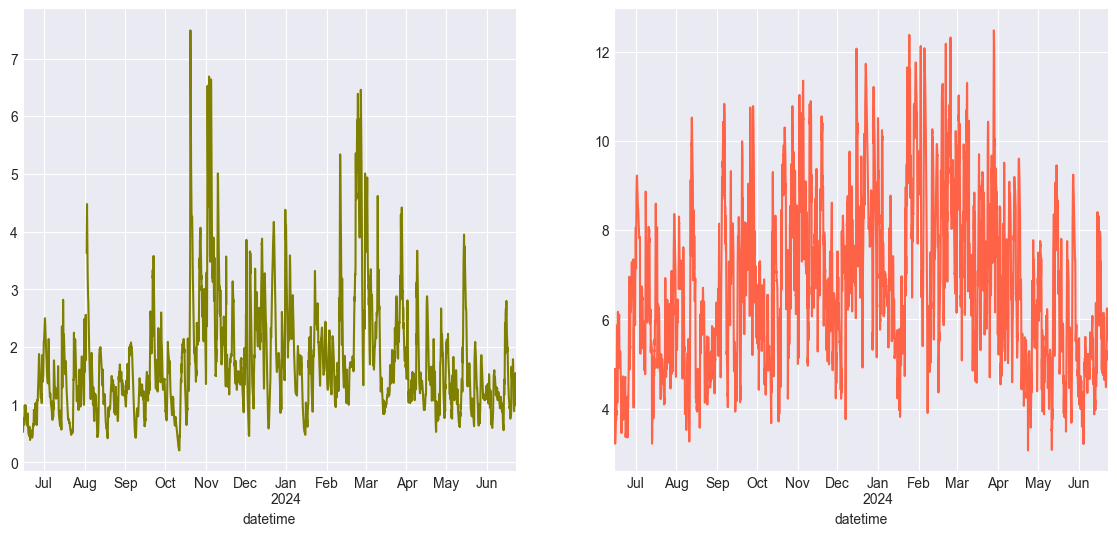

In [4]:
# Plot raw data
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize = (14,6))

df['wave_height'].plot(ax=ax[0], color = 'olive')
df['period'].plot(ax=ax[1], color = 'tomato')

plt.plot()

In [5]:
df.isnull().value_counts()

wave_height  period
False        False     8952
True         True        24
Name: count, dtype: int64

In [6]:
df[df['wave_height'].isnull()]

,wave_height,period
datetime,,
2023-08-02 01:00:00,NaN,NaN
2023-08-02 02:00:00,NaN,NaN
2023-08-02 03:00:00,NaN,NaN
2023-08-02 04:00:00,NaN,NaN
2023-08-02 05:00:00,NaN,NaN
2023-08-02 06:00:00,NaN,NaN
2023-08-02 07:00:00,NaN,NaN
2023-08-02 08:00:00,NaN,NaN
2023-08-02 09:00:00,NaN,NaN


Since there aren't a lot of missing values, I am going to impute them with the equivalent value from the previous day. I don't think this will have a huge impact on the predictive ability of the model. 

In [7]:
# Impute missing values
# ==============================================================================
for col in df.columns:
    df[col] = df[col].fillna(df[col].shift(24))

df.isnull().value_counts()

wave_height  period
False        False     8976
Name: count, dtype: int64

In [8]:
# Train-test split
# ==============================================================================
one_month = (-1)*30*24 # One month
two_months = (-1)*60*24 # Two months

end_train = one_month + two_months
end_val = one_month

df_train = df.iloc[:end_train].copy()
df_val = df.iloc[end_train:end_val].copy()
df_test = df.iloc[end_val:].copy()

print(f"Train dates      : {df_train.index.min()} --- {df_train.index.max()}  (n={len(df_train)})")
print(f"Validation dates : {df_val.index.min()} --- {df_val.index.max()}  (n={len(df_val)})")
print(f"Test dates       : {df_test.index.min()} --- {df_test.index.max()}  (n={len(df_test)})")

Train dates      : 2023-06-15 00:00:00 --- 2024-03-24 23:00:00  (n=6816)
Validation dates : 2024-03-25 00:00:00 --- 2024-05-23 23:00:00  (n=1440)
Test dates       : 2024-05-24 00:00:00 --- 2024-06-22 23:00:00  (n=720)


In [9]:
# Interactive plot of clean and split time series
# ==============================================================================
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train.index, y=df_train['wave_height'], mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=df_val.index, y=df_val['wave_height'], mode='lines', name='Validation'))
fig.add_trace(go.Scatter(x=df_test.index, y=df_test['wave_height'], mode='lines', name='Test'))
fig.update_layout(
    title  = '60-minute average wave height',
    xaxis_title="Time",
    yaxis_title="Meters",
    legend_title="Partition:",
    width=850,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.001
    )
)
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

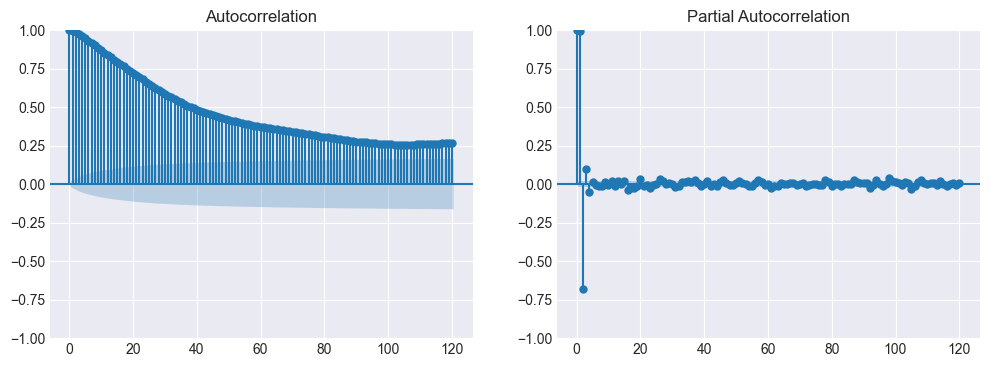

In [17]:
# ACF and PACF
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df['wave_height'], ax=ax[0], lags=120)
plot_pacf(df['wave_height'], ax=ax[1], lags=120)

plt.show()

In [13]:
# Save data
# ==============================================================================
df.to_csv(data_dir + '/spain_clean.csv')